In [1]:
from llama_parse import LlamaParse

In [2]:
from llama_index.core import SimpleDirectoryReader

Next, we’ll configure LlamaParse and
pass it to SimpleDirectoryReader as a file_extractor argument:

create a free accounthttps://cloud.llamaindex.ai

to get LLAMA_CLOUD_API_KEY

In [3]:
import os

print(os.getenv('LLAMA_CLOUD_API_KEY'))

llx-Lwr1JXNjYe06r1xaPX3vGC0Mbspq2d575l47JFahjs7o1CYO


In [4]:
parser = LlamaParse(result_type="text")

In [5]:
file_extractor = {".pdf": parser}

In [6]:
# Load files from file directory.
# Automatically select the best file reader given file extensions.

reader = SimpleDirectoryReader(
    input_dir      = "./files/pdf",
    file_extractor = file_extractor
)

In [7]:
import nest_asyncio
nest_asyncio.apply()

In [8]:
docs = reader.load_data()

Started parsing the file under job_id 3c1a6d74-83bb-412e-9adf-4305b806927d


In [9]:
docs

[Document(id_='c9e53d77-345c-4d3e-82b0-5d18a1b52626', embedding=None, metadata={'file_path': 'D:\\gridflowAI\\00-ALL COURSES REPO\\Innovative-AI\\01-GenAI\\06-LLMs\\code\\05-various LLMs\\10-LlamaIndex\\01-step wise examples\\files\\pdf\\sample.pdf', 'file_name': 'sample.pdf', 'file_type': 'application/pdf', 'file_size': 166234, 'creation_date': '2024-09-14', 'last_modified_date': '2024-09-09'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='     ARTICLE 1\nIn ancient Rome, the city of Rome itself was the heart of\nthe    vast Roman        Empire.         was known for its grand\narchitecture,       including       iconic     structures       like    the\nColosseum (Figure_1) and the Pantheon_                     The Romans\nwere      skilled    enginee

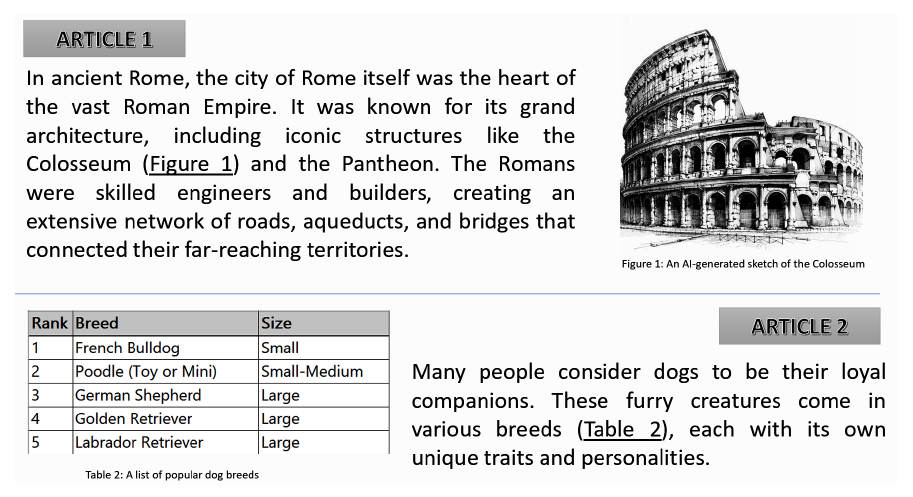

In [10]:
from pprint import pprint

In [11]:
# Function to pretty print document content and metadata
def pretty_print_documents(documents):
    for doc in documents:
        print(f"Document ID: {doc.id_}")
        print("Metadata:")
        pprint(doc.metadata, indent=4)
        print("\nContent:")
        print(doc.text)
        print("="*80)  # separator between documents

# Call the function
pretty_print_documents(docs)

Document ID: c9e53d77-345c-4d3e-82b0-5d18a1b52626
Metadata:
{   'creation_date': '2024-09-14',
    'file_name': 'sample.pdf',
    'file_path': 'D:\\gridflowAI\\00-ALL COURSES '
                 'REPO\\Innovative-AI\\01-GenAI\\06-LLMs\\code\\05-various '
                 'LLMs\\10-LlamaIndex\\01-step wise '
                 'examples\\files\\pdf\\sample.pdf',
    'file_size': 166234,
    'file_type': 'application/pdf',
    'last_modified_date': '2024-09-09'}

Content:
     ARTICLE 1
In ancient Rome, the city of Rome itself was the heart of
the    vast Roman        Empire.         was known for its grand
architecture,       including       iconic     structures       like    the
Colosseum (Figure_1) and the Pantheon_                     The Romans
were      skilled    engineers       and     builders,     creating      an
extensive network of roads, aqueducts, and bridges that
connected their far-reaching territories:                                          FigureAn Al-Renerated sketch 

Once the PDF content has been ingested into a new Document object, it’s time to build an index and
run a query against our data:

In [12]:
from llama_index.core import VectorStoreIndex

In [13]:
index = VectorStoreIndex.from_documents(docs)

In [14]:
qe = index.as_query_engine()

In [15]:
response = qe.query(
    "List all large dog breeds mentioned in Table 2 "
)

print(response)

German Shepherd, Golden Retriever, Labrador Retriever


In [16]:
response = qe.query(
    "Describe Figure 1 "
)

print(response)

Figure 1 is an iconic structure located in ancient Rome known as the Colosseum.


In [17]:
response = qe.query(
    "What is Article 2 "
)

print(response)

Article 2 discusses the popularity of dogs as loyal companions, highlighting various breeds and their unique traits and personalities.


#### read med table (pdf)

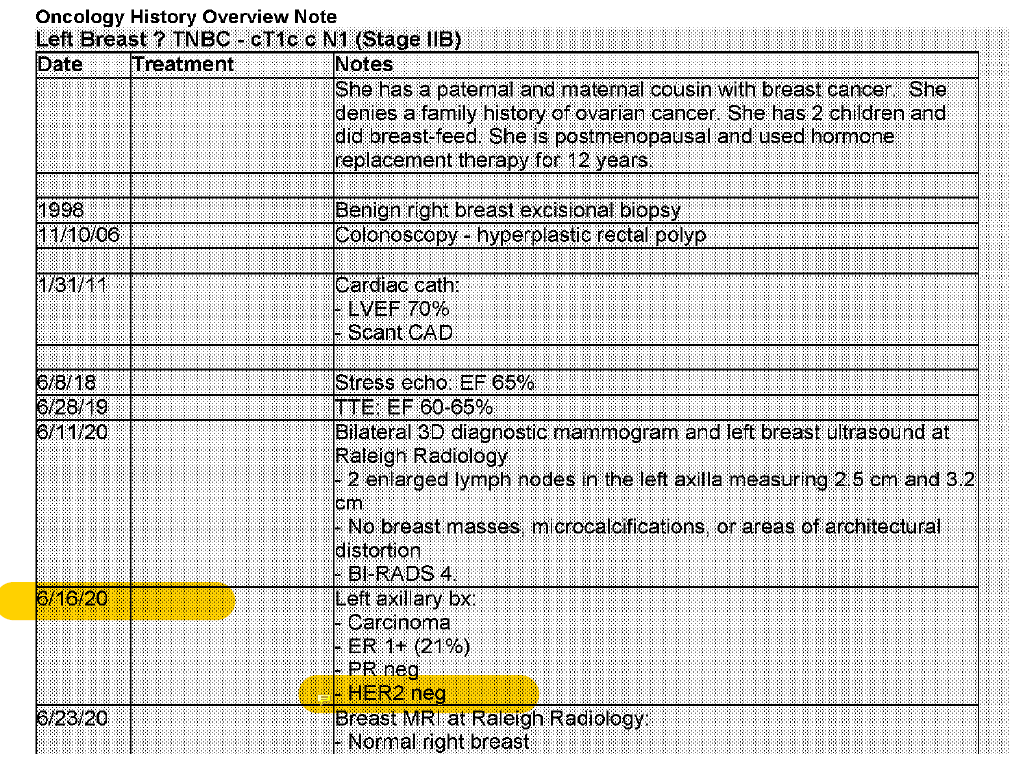

In [18]:
# Load files from file directory.
# Automatically select the best file reader given file extensions.

reader = SimpleDirectoryReader(
    input_files      = ["./files/pdf/meds/med-first-page.pdf"],
    file_extractor   = file_extractor
)

In [19]:
docs = reader.load_data()

Started parsing the file under job_id 7555c1c0-a74c-450f-a3bc-1a2dfcff2c62


In [20]:
index = VectorStoreIndex.from_documents(docs)

In [21]:
qe = index.as_query_engine()

In [23]:
response = qe.query(
    "what is stress Echo percetage? "
)

print(response)

The stress echo percentage is not provided in the given context information.


In [25]:
response = qe.query(
    "when was colonoscopy done "
)

print(response)

The context does not provide any information about when a colonoscopy was done.


In [26]:
response = qe.query(
    "result of breast biopsy "
)

print(response)

The context provided does not contain any information related to a breast biopsy or its results.


In [24]:
response = qe.query(
    "Describe the oncology history "
)

print(response)

The patient's oncology history includes a request for Keytruda (pembrolizumab) as part of the treatment regimen. Additionally, the patient has experienced disease progression while receiving another programmed death receptor-1 (PD-1) or programmed death ligand (PD-L1) Inhibitor. The medications Abraxane, Paraplatin, Decadron, and Zolin are also listed as part of the treatment regimen. The clinical setting for Keytruda use is specified as first-line treatment for anal carcinoma.


- One important consideration with using a hosted service such as **LlamaParse** is **data privacy**.
- Before submitting your proprietary data through the API, carefully review their **privacy policy** to ensure it aligns with your **data protection requirements**.
- While the service offers powerful **parsing capabilities**, safeguarding **sensitive information** is crucial.


- For higher volume needs, the current **pricing** can be found on the website.
- To unlock the full potential of **LlamaParse** for building **advanced document retrieval systems**, or to **deploy it on your private cloud** for maximum **data security**, that option is available as well.
